In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [36]:
df = pd.read_csv('data/zippedData/tmdb_movies_data.csv.zip')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [37]:
cols_to_drop = ['id', 'imdb_id','cast', 'homepage', 'director','tagline', 'overview', 'production_companies','keywords' ,'vote_count','genres','release_date','release_year','vote_average','budget_adj','popularity','revenue_adj']
df_mod = df.drop(cols_to_drop, axis=1)
df_mod.head()

,budget,revenue,original_title,runtime
0,150000000,1513528810,Jurassic World,124
1,150000000,378436354,Mad Max: Fury Road,120
2,110000000,295238201,Insurgent,119
3,200000000,2068178225,Star Wars: The Force Awakens,136
4,190000000,1506249360,Furious 7,137


In [38]:
for col in df_mod.columns:
    pct_missing = np.mean(df_mod[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

budget - 0.0%
revenue - 0.0%
original_title - 0.0%
runtime - 0.0%


In [39]:
df_mod= df_mod.sort_values("revenue", ascending=False)

In [40]:
df_mod.tail(10)

,budget,revenue,original_title,runtime
1159,0,0,Jackass Presents: Bad Grandpa .5,76
1160,0,0,Dark Was the Night,97
1161,0,0,Asthma,90
1162,0,0,Saint Laurent,150
1163,0,0,Street Fighter: Assassin's Fist,152
1164,0,0,Jamie Marks Is Dead,100
5421,0,0,Les Randonneurs,95
5419,0,0,Le Pari,100
5418,0,0,Jack Frost,89
10865,19000,0,Manos: The Hands of Fate,74


In [41]:
df_mod.describe()

,budget,revenue,runtime
count,1.086600e+04,1.086600e+04,10866.000000
mean,1.462570e+07,3.982332e+07,102.070863
std,3.091321e+07,1.170035e+08,31.381405
min,0.000000e+00,0.000000e+00,0.000000
25%,0.000000e+00,0.000000e+00,90.000000
50%,0.000000e+00,0.000000e+00,99.000000
75%,1.500000e+07,2.400000e+07,111.000000
max,4.250000e+08,2.781506e+09,900.000000


In [42]:
runtime_mean = np.mean(df_mod.runtime)
runtime_mean

102.07086324314375

In [43]:
runtime_median = np.median(df_mod.runtime)
runtime_median

99.0

In [45]:
rev = df_mod['revenue'].head(20).values
rev


array([2781505847, 2068178225, 1845034188, 1519557910, 1513528810,
       1506249360, 1405035767, 1327817822, 1274219009, 1215439994,
       1156730962, 1123746996, 1118888979, 1108561013, 1106279658,
       1081041287, 1065659812, 1063171911, 1025467110, 1021683000])

In [46]:
run = df_mod['runtime'].head(20).values
run


array([162, 136, 194, 143, 124, 137, 141, 130, 102, 130,  91, 154, 201,
       143, 114, 165, 151, 103, 108, 136])

In [47]:
tit = df_mod['original_title'].head(20).values
tit 

array(['Avatar', 'Star Wars: The Force Awakens', 'Titanic',
       'The Avengers', 'Jurassic World', 'Furious 7',
       'Avengers: Age of Ultron',
       'Harry Potter and the Deathly Hallows: Part 2', 'Frozen',
       'Iron Man 3', 'Minions', 'Transformers: Dark of the Moon',
       'The Lord of the Rings: The Return of the King', 'Skyfall',
       'The Net', 'The Dark Knight Rises',
       "Pirates of the Caribbean: Dead Man's Chest", 'Toy Story 3',
       'Alice in Wonderland',
       'Pirates of the Caribbean: On Stranger Tides'], dtype=object)

In [48]:
#plt.figure(figsize=(10, 8))
#sns.barplot(x= tit, y= rev, hue= run, data=df_mod)
#plt.tick_params(axis='x', labelrotation = 90)
#plt.ylabel("Revenue", size=14)
#plt.xlabel("Movie Title", size=14)
#plt.title("Runtime Comparison to Revenue", size=18)
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")



In [49]:

#data = df_mod[['runtime', 'revenue']]
#x = data['runtime']
#y = data['revenue']
#plt.scatter(x, y)

#plt.title('Runtime Comparison to Revenue')
#plt.xlabel('Movie Time - min -')
#plt.ylabel('Revenue in Billions')
#plt.axvline(df_mod['runtime'].mean(), color = 'g')
#mean_patch = mpatches.Patch(color='g', label='Mean Budget')
#trend_patch = mpatches.Patch(color='r', label='Trend Line')
#plt.legend(handles=[mean_patch, trend_patch])


#plt.show()

In [75]:
df_mod2 = df_mod.loc[(df_mod['runtime'] >= 40) & (df_mod['runtime'] <= 190) & (df_mod['revenue'] > 226830568) & (df_mod['revenue'] < 2068178225)]
df_mod2

,budget,revenue,original_title,runtime
4361,220000000,1519557910,The Avengers,143
0,150000000,1513528810,Jurassic World,124
4,190000000,1506249360,Furious 7,137
14,280000000,1405035767,Avengers: Age of Ultron,141
3374,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,130
...,...,...,...,...
7402,110000000,228738393,Ghost Rider,114
9190,25000000,227853986,Lethal Weapon 2,114
3462,120000000,227817248,The Green Hornet,119
10240,21000000,227799884,Sleepless in Seattle,105


In [85]:
runtime_25_percentile = df_mod2['runtime'].quantile(.25)
runtime_75_percentile = df_mod2['runtime'].quantile(.75)
stand_dev_ = df_mod2['runtime'].std()

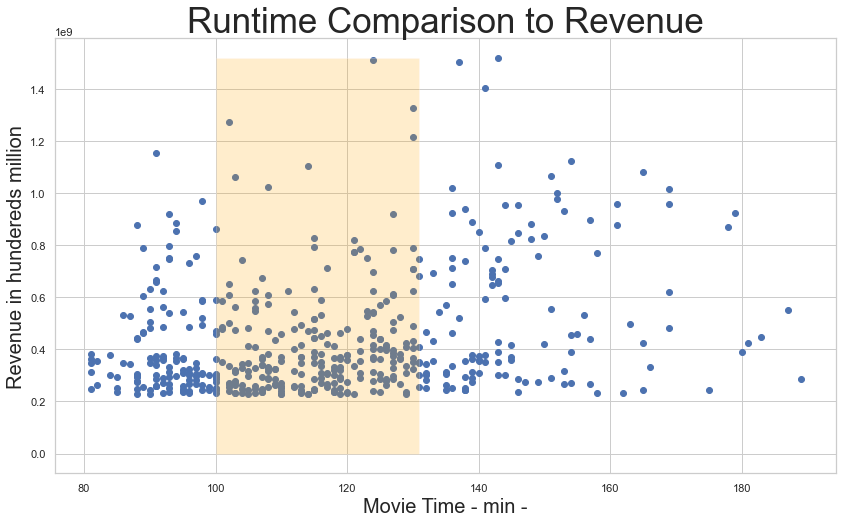

In [88]:
fig, ax = plt.subplots(figsize=(14,8))
data = df_mod2[['runtime', 'revenue']]
x = data['runtime']
y = data['revenue']
plt.scatter(x, y)

#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x,p(x),"r-")

plt.title('Runtime Comparison to Revenue', fontsize=35)
plt.xlabel('Movie Time - min -', fontsize=20)
plt.ylabel('Revenue in hundereds million', fontsize= 20)
# plt.axvline(df_mod['runtime'].mean(), color = 'green', label='Mean')
#plt.axvline(runtime_25_percentile, color = 'blue', label='25th percentile')
#plt.axvline(runtime_75_percentile, color = 'black', label='75th percentile')
plt.fill_between([runtime_25_percentile, runtime_75_percentile], max(y), facecolor='orange', alpha=.2)
# plt.axvline(runtime_median, color = 'orange', label='Median')
# plt.axvline(runtime_75_percentile + stand_dev_, color = 'cyan', label='1 Std')
#mean_patch = mpatches.Patch(color='g', label='Mean Budget')
#trend_patch = mpatches.Patch(color='r', label='Trend Line')
#plt.legend(fontsize=18)


plt.show()

###### df_run = df_mod['runtime']

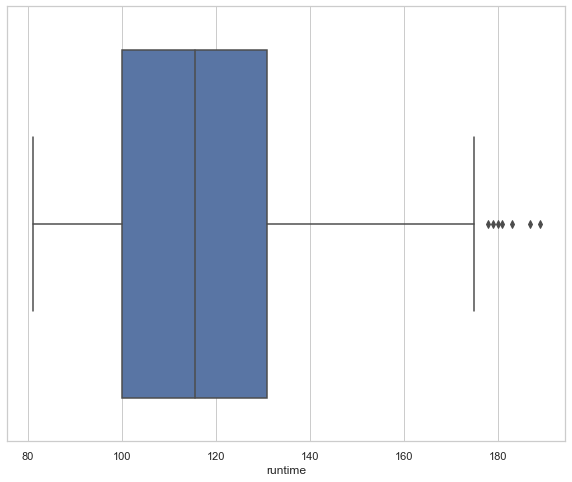

In [77]:
plt.figure(figsize=(10, 8))
sns.boxplot(x=df_mod2['runtime'])
#sns.boxplot(x=df_mod['runtime'], showfliers=False)
plt.show()
#plt.ylabel('Revenue in hundereds million', fontsize= 20)
#plt.xlabel('Runtime - min -', fontsize=20)
#plt.title('Runtime excluding', size=18)
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
#plt.axvline(df_mod['runtime'].mean(), color = 'g', label='Mean')
#plt.axvline(runtime_25_percentile, color = 'b', label='25th percentile')
#plt.axvline(runtime_75_percentile, color = 'y', label='75th percentile')
#plt.axvline(runtime_median, color = 'k', label='Median')
#plt.tick_params(axis='x', labelrotation = 90)
#plt.legend()

In [20]:
df_mod3 = df_mod['revenue'].head(500)
df_mod3

1386     2781505847
3        2068178225
5231     1845034188
4361     1519557910
0        1513528810
            ...    
9190      227853986
3462      227817248
10240     227799884
3437      226904017
2878      226830568
Name: revenue, Length: 500, dtype: int64

In [25]:
#plt.figure(figsize=(15, 10))
#sns.set(style='whitegrid') 
#sns.scatterplot(x="runtime", y="revenue", data=df_mod2)
#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x,p(x),"r-")

#plt.title('Runtime Comparison to Revenue', fontsize=26)
#plt.xlabel('Movie Time - min -', fontsize=18)
#plt.ylabel('Revenue in hundereds million', fontsize= 18)
#plt.axvline(df_mod['runtime'].mean(), color = 'g', label='Mean')
#plt.axvline(runtime_25_percentile, color = 'b', label='25th percentile')
#plt.axvline(runtime_75_percentile, color = 'y', label='75th percentile')
#plt.axvline(runtime_median, color = 'k', label='Median')
#plt.legend(fontsize=10)

Text(0.5, 1.0, 'Rotten Tomatos User Generated Ratings')

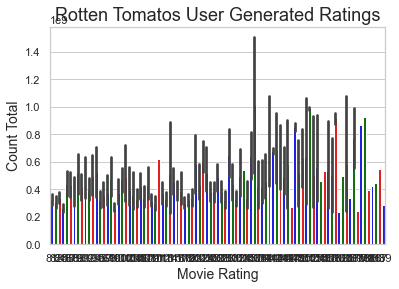

In [71]:
sns.barplot(x="runtime", y="revenue", data=df_mod2, palette=['blue', 'green', 'red'])
plt.ylabel("Count Total", size=14)
plt.xlabel("Movie Rating", size=14)
plt.title("Rotten Tomatos User Generated Ratings", size=18)

In [23]:
df_mod2.describe()

,budget,revenue,runtime
count,4.950000e+02,4.950000e+02,495.000000
mean,1.005995e+08,4.524968e+08,117.745455
std,6.176121e+07,2.469438e+08,21.644811
min,0.000000e+00,2.269040e+08,81.000000
25%,5.200000e+07,2.857927e+08,100.000000
50%,9.300000e+07,3.620001e+08,116.000000
75%,1.400000e+08,5.423294e+08,131.000000
max,3.800000e+08,2.068178e+09,189.000000


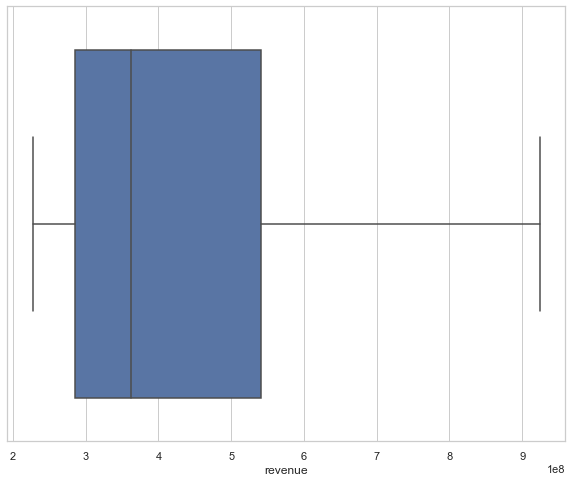

In [66]:
plt.figure(figsize=(10, 8))
#sns.boxplot(x=df_mod2['revenue'])
sns.boxplot(x=df_mod2['revenue'], showfliers=False)
plt.show()